In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import OneClassSVM
from collections import Counter
import warnings

# Ignorar ciertos tipos de advertencias para evitar mensajes innecesarios
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
# Cargar el conjunto de datos Iris desde un archivo CSV
iris= pd.read_csv("iris.csv")

# Seleccionar las columnas relevantes como características de entrada (X) y la variable objetivo (y)
columnas_x = ['SepalWidthCm','PetalLengthCm']

X = iris[columnas_x]
y = iris['Species']

# Crear un DataFrame para facilitar la manipulación de datos
columns=['SepalWidthCm','PetalLengthCm']
df = pd.DataFrame(data=X,columns=columns)
df.head()


,SepalWidthCm,PetalLengthCm
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4


In [4]:
# Entrenar un modelo OneClassSVM para detección de anomalías
model = OneClassSVM(kernel='rbf',degree=3,nu=0.1).fit(X)
model

OneClassSVM(nu=0.1)

In [5]:
# Hacer predicciones utilizando el modelo
predictions = model.predict(X)

# Crear un DataFrame para los datos originales
outliers_df = pd.DataFrame(df)

# Imprimir la distribución de valores predichos (+1 para normales, -1 para anomalías)
print(Counter(predictions))

# Filtrar y mostrar las filas que fueron clasificadas como anomalías
outliers_df[predictions==-1].head(4)

Counter({1: 134, -1: 16})


,SepalWidthCm,PetalLengthCm
13,3.0,1.1
14,4.0,1.2
15,4.4,1.5
32,4.1,1.5


c:\Users\NestorBD\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(


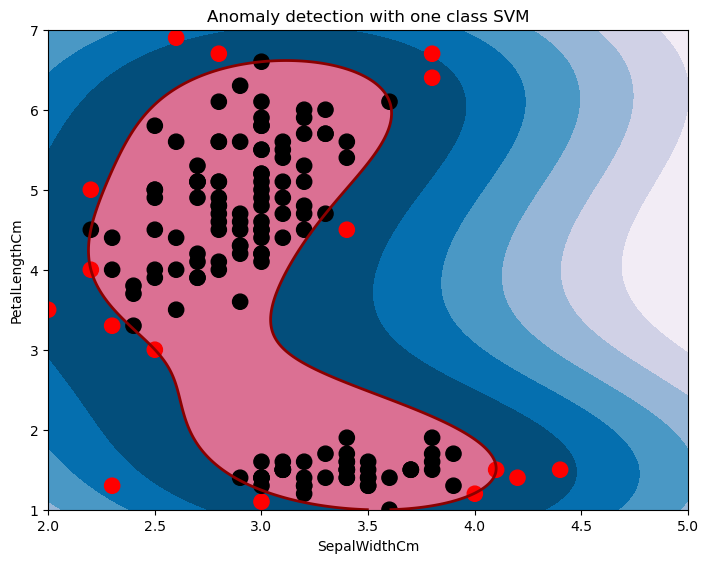

In [6]:
# Crear un gráfico para visualizar las predicciones y el límite de decisión
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

# Mapa de colores para los puntos clasificados como normales o anomalías 
colors = predictions
def labels_to_colors(x):
    if x == -1:
        return 'red'
    elif x == 1:
        return 'black'

colors = list(colors)
colors = list(map(lambda x: labels_to_colors(x), colors))

x = X.iloc[:, 0]
y = X.iloc[:, 1]

# Crear una malla para el límite de decisión y visualizarlo en el gráfico
xx, yy = np.meshgrid(np.linspace(2, 5, 500), np.linspace(1, 7, 500))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

# Visualizar los datos en el gráfico de dispersión
ax.scatter(x,y,c=colors,s=120,marker='o')
ax.set_title('Anomaly detection with one class SVM')
ax.set_xlabel(columns[0])
ax.set_ylabel(columns[1])

plt.show()